<a href="https://colab.research.google.com/github/khadjiantonis/Data-Engineering/blob/main/Data%20Engineering%20exc2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Upgrade and import  the libraries

In [ ]:
!pip install --upgrade panda
import pandas as pd
import requests
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd


  Preparing metadata (setup.py) ... done
  Created wheel for panda: filename=panda-0.3.1-py3-none-any.whl size=7239 sha256=0adb57335b6cbf20e9485e0feada7242c272d839eea1805f9e471b1381af2055
  Stored in directory: /root/.cache/pip/wheels/0e/8b/c3/ff9cbde1fffd8071cff8367a86f0350a1ce30a8d31b6a432e9
Successfully built panda


#Create directory/folders to save the data and the relevant files

In [ ]:

os.makedirs('CovidRecovery/RawData', exist_ok=True)
os.makedirs('CovidRecovery/output', exist_ok=True)
os.makedirs('CovidRecovery/code', exist_ok=True)
os.makedirs('CovidRecovery/CSV', exist_ok=True)

#Load the data

Download the datasets in .csv form from the web

Download the datasets that we will need to use to

*   datasets ppp_dataset 1-12 are from the ppp_data
*   dataset jobs is from the job posting
*   dataset Population Estimatesis from the US Census Bureau  





In [ ]:
urls =[ 'https://data.sba.gov/dataset/8aa276e2-6cab-4f86-aca4-a7dde42adf24/resource/738e639c-1fbf-4e16-beb0-a223831011e8/download/public_150k_plus_230930.csv',
        'https://data.sba.gov/dataset/8aa276e2-6cab-4f86-aca4-a7dde42adf24/resource/a7fa66f4-fd2e-433c-8ef9-59780ef60ae5/download/public_up_to_150k_1_230930.csv',
        'https://data.sba.gov/dataset/8aa276e2-6cab-4f86-aca4-a7dde42adf24/resource/7d2308a8-0ac1-48a8-b21b-f9eb373ac417/download/public_up_to_150k_2_230930.csv',
        'https://data.sba.gov/dataset/8aa276e2-6cab-4f86-aca4-a7dde42adf24/resource/5158aae1-066d-4d01-a226-e44ecc9bdda7/download/public_up_to_150k_3_230930.csv',
        'https://data.sba.gov/dataset/8aa276e2-6cab-4f86-aca4-a7dde42adf24/resource/d888bab1-da5b-46f2-bed2-a052d48af246/download/public_up_to_150k_4_230930.csv',
        'https://data.sba.gov/dataset/8aa276e2-6cab-4f86-aca4-a7dde42adf24/resource/ee12d751-2bb4-4343-8330-32311ae4e7c7/download/public_up_to_150k_5_230930.csv',
        'https://data.sba.gov/dataset/8aa276e2-6cab-4f86-aca4-a7dde42adf24/resource/27b874d9-a059-4296-bb74-374294c48616/download/public_up_to_150k_6_230930.csv',
        'https://data.sba.gov/dataset/8aa276e2-6cab-4f86-aca4-a7dde42adf24/resource/434efae0-016a-48da-92dc-c6f113d827c1/download/public_up_to_150k_7_230930.csv',
        'https://data.sba.gov/dataset/8aa276e2-6cab-4f86-aca4-a7dde42adf24/resource/4fc8e993-c3b9-4eb2-b9bb-dfbde9b1fb6f/download/public_up_to_150k_8_230930.csv',
        'https://data.sba.gov/dataset/8aa276e2-6cab-4f86-aca4-a7dde42adf24/resource/7f9c6867-2b55-472e-a4f3-fd0f5f27f790/download/public_up_to_150k_9_230930.csv',
        'https://data.sba.gov/dataset/8aa276e2-6cab-4f86-aca4-a7dde42adf24/resource/a8f2c8b2-facb-4e97-ad5f-7c8736c8b4b6/download/public_up_to_150k_10_230930.csv',
        'https://data.sba.gov/dataset/8aa276e2-6cab-4f86-aca4-a7dde42adf24/resource/6f9787a3-afd6-45b2-b78e-ad0dc097c1c3/download/public_up_to_150k_11_230930.csv']



for i, url in enumerate(urls, start=1):
    filename = f'ppp_dataset{i}.csv'
    filepath = os.path.join('CovidRecovery', 'RawData', filename)
    response = requests.get(url)
    if response.status_code == 200:
        with open(filepath, 'wb') as f:
            f.write(response.content)
        print(f'Dataset {i} downloaded and saved successfully.')
    else:
        print(f'Failed to download dataset {i}. Status code: {response.status_code}')
path = 'CovidRecovery/RawData/data.csv'

Dataset 1 downloaded and saved successfully.
Dataset 2 downloaded and saved successfully.
Dataset 3 downloaded and saved successfully.
Dataset 4 downloaded and saved successfully.
Dataset 5 downloaded and saved successfully.
Dataset 6 downloaded and saved successfully.
Dataset 7 downloaded and saved successfully.
Dataset 8 downloaded and saved successfully.
Dataset 9 downloaded and saved successfully.
Dataset 10 downloaded and saved successfully.
Dataset 11 downloaded and saved successfully.
Dataset 12 downloaded and saved successfully.


In [ ]:
urls ='https://raw.githubusercontent.com/OpportunityInsights/EconomicTracker/main/data/Job%20Postings%20-%20State%20-%20Weekly.csv'
filepath = os.path.join('CovidRecovery', 'RawData','jobs.csv')
response = requests.get(urls)
if response.status_code == 200:
  with open(filepath, 'wb') as f:
    f.write(response.content)
  print('jobs downloaded and saved successfully.')
else:
  print(f'Failed to download jobs. Status code: {response.status_code}')
path = 'CovidRecovery/RawData/data.csv'

jobs downloaded and saved successfully.


In [ ]:
urls = 'https://www2.census.gov/programs-surveys/popest/datasets/2020-2023/counties/totals/co-est2023-alldata.csv'
filepath = os.path.join('CovidRecovery', 'RawData','Population Estimates.csv')
response = requests.get(urls)
if response.status_code == 200:
  with open(filepath, 'wb') as f:
    f.write(response.content)
  print(f'Population Estimates downloaded and saved successfully.')
else:
  print(f'Failed to download Population Estimates. Status code: {response.status_code}')
path = 'CovidRecovery/RawData/data.csv'

Population Estimates downloaded and saved successfully.


#Transfrom the datasets into data frames

In [ ]:
# Define the columns to keep
keep_columns = [
    'DateApproved','BorrowerState', 'InitialApprovalAmount','ServicingLenderState',
    'CurrentApprovalAmount','BusinessType', 'Race', 'Ethnicity', 'Gender', 'Veteran']

# Define the data types for each column
dtype_dict = {
    'DateApproved':'string', 'BorrowerState': 'string', 'InitialApprovalAmount': 'float64',
    'CurrentApprovalAmount': 'float64', 'ServicingLenderState': 'string', 'BusinessType': 'string',
    'Race': 'string', 'Ethnicity': 'string', 'Gender': 'string', 'Veteran': 'string'}

# Load the dataset with specified data types
ppp_data = {}
for i in range (1,13):
  ppp_data[i] = pd.read_csv('CovidRecovery/RawData/'f'ppp_dataset{i}.csv', usecols=keep_columns, dtype=dtype_dict)
  ppp_data[i]['DateApproved'] = pd.to_datetime(ppp_data[i]['DateApproved'], format='%m/%d/%Y')



In [ ]:
job_data = pd.read_csv('CovidRecovery/RawData/jobs.csv')

In [ ]:
# Define the columns to keep
keep_columns1 = [
    'STATE','POPESTIMATE2020','POPESTIMATE2023']
# Define the data types for each column
dtype_dict1 = {
 'STATE': 'int64',  'POPESTIMATE2020': 'int64',  'POPESTIMATE2023': 'int64'}

# Load the dataset with specified data types
p_e= pd.read_csv('CovidRecovery/RawData/Population Estimates.csv', encoding = 'latin1', usecols=keep_columns1, dtype=dtype_dict1)


Print the head of some dataframes

In [ ]:
print(p_e.head())


   STATE  POPESTIMATE2020  POPESTIMATE2023
0      1          5031864          5108468
1      1            58915            60342
2      1           233227           253507
3      1            24969            24585
4      1            22188            21868


In [ ]:
print(job_data.head(15))

    year  month  day_endofweek  statefips bg_posts bg_posts_ss30  \
0   2020      1             10          1        .             .   
1   2020      1             10          2        .             .   
2   2020      1             10          4        .             .   
3   2020      1             10          5        .             .   
4   2020      1             10          6        .             .   
5   2020      1             10          8        .             .   
6   2020      1             10          9        .             .   
7   2020      1             10         10        .             .   
8   2020      1             10         11        .             .   
9   2020      1             10         12        .             .   
10  2020      1             10         13        .             .   
11  2020      1             10         15        .             .   
12  2020      1             10         16        .             .   
13  2020      1             10         17       

Concat all the ppp_datasets[i] into one data frame

In [ ]:
ppp = pd.DataFrame(columns=keep_columns)
for i in range(1,13):
  ppp = pd.concat([ppp,ppp_data[i]],ignore_index= True)

In [ ]:
ppp.head()

,DateApproved,BorrowerState,InitialApprovalAmount,ServicingLenderState,CurrentApprovalAmount,BusinessType,Race,Ethnicity,Gender,Veteran
0,2020-05-01,<NA>,769358.78,GA,769358.78,Corporation,Unanswered,Unknown/NotStated,Unanswered,Unanswered
1,2020-05-01,<NA>,736927.79,GA,736927.79,Sole Proprietorship,White,Unknown/NotStated,Male Owned,Non-Veteran
2,2020-05-01,<NA>,691355.00,NC,691355.00,Non-Profit Organization,Unanswered,Unknown/NotStated,Unanswered,Unanswered
3,2020-05-01,<NA>,499871.00,NC,499871.00,Corporation,American Indian or Alaska Native,Not Hispanic or Latino,Male Owned,Non-Veteran
4,2020-05-01,<NA>,367437.00,OH,367437.00,<NA>,Unanswered,Unknown/NotStated,Unanswered,Unanswered


Dimensions of the data frames

In [ ]:
ppp.shape

(10868525, 10)

Describe the data

In [ ]:
ppp.describe()

,DateApproved,InitialApprovalAmount,CurrentApprovalAmount
count,10868525,1.086852e+07,1.086852e+07
mean,2020-10-30 03:46:07.245086720,7.180101e+04,7.142326e+04
min,2020-04-03 00:00:00,-1.996590e+05,0.000000e+00
25%,2020-04-30 00:00:00,9.622000e+03,9.600000e+03
50%,2021-01-28 00:00:00,2.074300e+04,2.073500e+04
75%,2021-03-30 00:00:00,4.148367e+04,4.130000e+04
max,2021-07-19 00:00:00,1.000000e+07,1.000000e+07
std,NaN,2.671221e+05,2.643924e+05


#Clean Data

Find NaN values and fixxing the missing data.

In [ ]:
ppp.isna().sum()

DateApproved                0
BorrowerState             165
InitialApprovalAmount       0
ServicingLenderState       28
CurrentApprovalAmount       0
BusinessType             2206
Race                        0
Ethnicity                   0
Gender                      0
Veteran                     0
dtype: int64

Remove all the NaN values from the ppp data frame

In [ ]:
ppp = ppp.dropna()
ppp.isna().sum()

DateApproved             0
BorrowerState            0
InitialApprovalAmount    0
ServicingLenderState     0
CurrentApprovalAmount    0
BusinessType             0
Race                     0
Ethnicity                0
Gender                   0
Veteran                  0
dtype: int64

In [ ]:
ppp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10866192 entries, 13 to 10868524
Data columns (total 10 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   DateApproved           datetime64[ns]
 1   BorrowerState          string        
 2   InitialApprovalAmount  float64       
 3   ServicingLenderState   string        
 4   CurrentApprovalAmount  float64       
 5   BusinessType           string        
 6   Race                   string        
 7   Ethnicity              string        
 8   Gender                 string        
 9   Veteran                string        
dtypes: datetime64[ns](1), float64(2), string(7)
memory usage: 911.9 MB


#Analyze Data

Create a sample for the ppp data frame. The original data frame is to big so we take a fruction of 2% of the original data frame.

In [ ]:
ppp_sample = ppp.sample(frac = 0.02)

Create plots for the categorical variables

1.   Barplots
2.   Pie charts


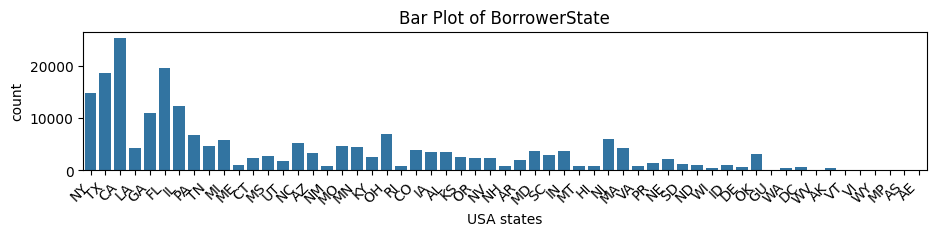

In [ ]:
plt.figure(figsize=(10, 3))
sns.countplot(data=ppp_sample, x='BorrowerState')
plt.title('Bar Plot of BorrowerState')
plt.xlabel('USA states')
plt.xticks(rotation=45, ha='right')
plt.tight_layout(pad =3.0)
plt.show()

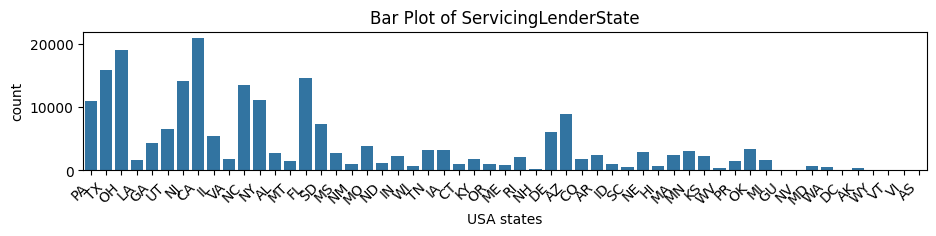

In [ ]:
plt.figure(figsize=(10, 3))
sns.countplot(data=ppp_sample, x='ServicingLenderState')
plt.title('Bar Plot of ServicingLenderState')
plt.xlabel('USA states')
plt.xticks(rotation=45, ha='right')
plt.tight_layout(pad =3.0)
plt.show()

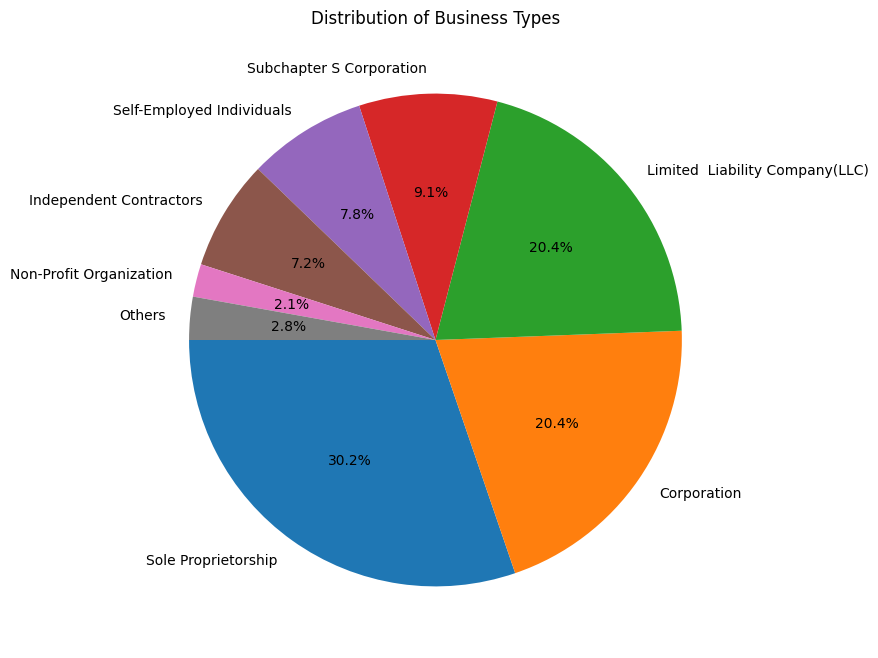

In [ ]:
# Bar Plot for Categorical Columns

# Calculate the percentage of each business type
business_type_count = ppp['BusinessType'].value_counts()
business_type_percentage = business_type_count / business_type_count.sum() * 100

# Separate business types into those with >=2% and those with <2%
threshold = 2
large_categories = business_type_percentage[business_type_percentage >= threshold].index
small_categories = business_type_percentage[business_type_percentage < threshold].index

# Create a combined series for plotting
combined_business_type_count = business_type_count.copy()
combined_business_type_count['Others'] = combined_business_type_count[small_categories].sum()
combined_business_type_count = combined_business_type_count.drop(small_categories)

# Plot the distribution of combined BusinessType as a pie chart
plt.figure(figsize=(12, 8))
combined_business_type_count.plot.pie(autopct='%1.1f%%', startangle=180)
plt.title('Distribution of Business Types')
plt.ylabel('')  # Hide the y-label for a cleaner look

plt.show()

<ipython-input-22-4a7d7e15ea63>:7: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout(pad =3.0)


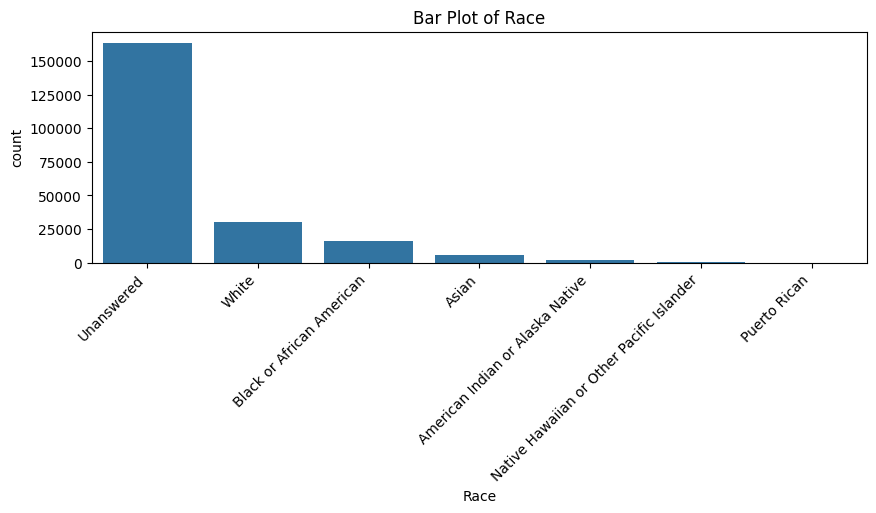

In [ ]:
# Bar Plot for Categorical Columns
plt.figure(figsize=(10, 3))
sns.countplot(data=ppp_sample, x='Race')
plt.title('Bar Plot of Race')
plt.xlabel('Race')
plt.xticks(rotation=45, ha='right')
plt.tight_layout(pad =3.0)
plt.show()




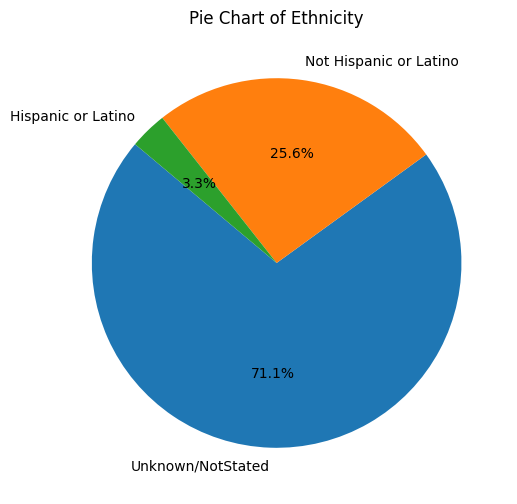

In [ ]:
ethnicity_counts = ppp_sample['Ethnicity'].value_counts()
plt.figure(figsize=(10, 6))
plt.pie(ethnicity_counts, labels=ethnicity_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart of Ethnicity')
plt.show()

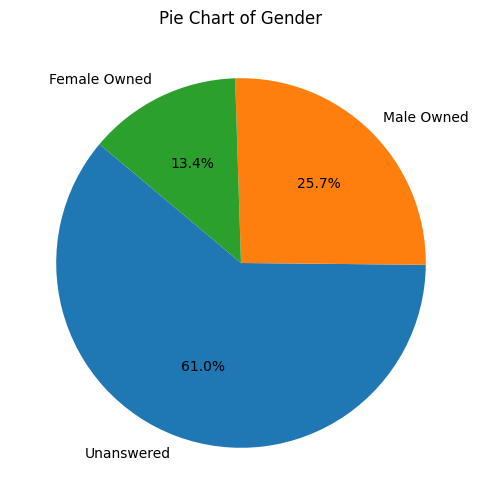

In [ ]:
gender_counts = ppp_sample['Gender'].value_counts()
plt.figure(figsize=(10, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart of Gender')
plt.show()

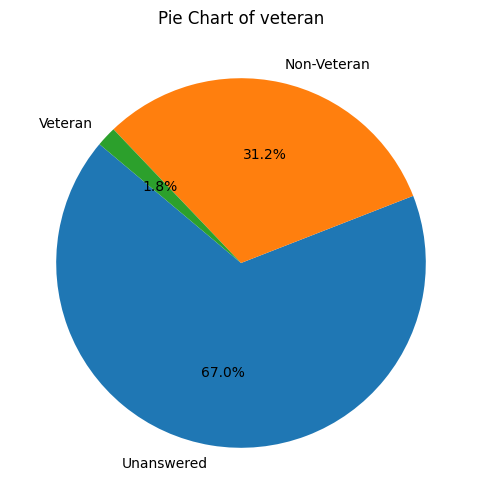

In [ ]:
veteran_counts = ppp_sample['Veteran'].value_counts()
plt.figure(figsize=(10, 6))
plt.pie(veteran_counts, labels=veteran_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart of veteran')
plt.show()

<ipython-input-26-cbb7e90ce464>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x='Count', y='BorrowerState', data=state_counts, palette=palette, orient='h')


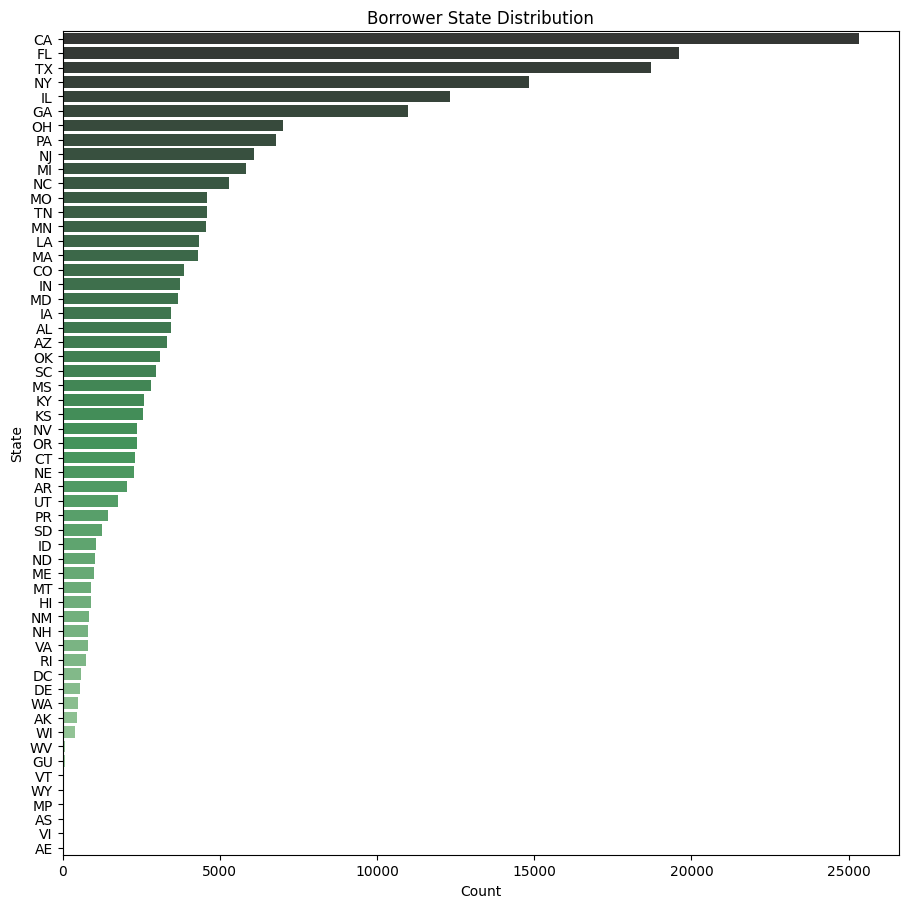

In [ ]:
state_counts = ppp_sample['BorrowerState'].value_counts().reset_index()
state_counts.columns = ['BorrowerState', 'Count']

# Generate a color palette with the same number of colors as the number of states
palette = sns.color_palette("Greens_d", len(state_counts))

# Sort the palette based on the count
palette = palette[::-1]

# Create the barplot with custom colors
plt.figure(figsize=(10, 10))
bar_plot = sns.barplot(x='Count', y='BorrowerState', data=state_counts, palette=palette, orient='h')

# Add title and labels
plt.title('Borrower State Distribution')
plt.xlabel('Count')
plt.ylabel('State')

# Show plot
plt.tight_layout(pad=4.0)
plt.show()

In [ ]:
job_data.isna().sum()

year                 0
month                0
day_endofweek        0
statefips            0
bg_posts             0
bg_posts_ss30        0
bg_posts_ss55        0
bg_posts_ss60        0
bg_posts_ss65        0
bg_posts_ss70        0
bg_posts_jz1         0
bg_posts_jzgrp12     0
bg_posts_jz2         0
bg_posts_jz3         0
bg_posts_jzgrp345    0
bg_posts_jz4         0
bg_posts_jz5         0
dtype: int64

In [ ]:
job_data[['statefips']]

,statefips
0,1
1,2
2,4
3,5
4,6
...,...
11674,51
11675,53
11676,54
11677,55


#Output Data

Transform the data

Transform the FIPS code into states

In [ ]:
fips_to_states = {
     1: 'AL', 2: 'AK', 4: 'AZ', 5: 'AR', 6: 'CA',
    8: 'CO', 9: 'CT', 10: 'DE', 11: 'DC',
    12: 'FL', 13: 'GA', 15: 'HI', 16: 'ID', 17: 'IL',
    18: 'IN', 19: 'IA', 20: 'KS', 21: 'KY', 22: 'LA',
    23: 'ME', 24: 'MD', 25: 'MA', 26: 'MI', 27: 'MN',
    28: 'MS', 29: 'MO', 30: 'MT', 31: 'NE', 32: 'NV',
    33: 'NH', 34: 'NJ', 35: 'NM', 36: 'NY',
    37: 'NC', 38: 'ND', 39: 'OH', 40: 'OK', 41: 'OR',
    42: 'PA', 44: 'RI', 45: 'SC', 46: 'SD',
    47: 'TN', 48: 'TX', 49: 'UT', 50: 'VT', 51: 'VA',
    53: 'WA', 54: 'WV', 55: 'WI', 56: 'WY'}
job_data['state'] = job_data['statefips'].map(fips_to_states)
p_e['STATE'] = p_e['STATE'].astype(int)
p_e['state'] = p_e['STATE'].map(fips_to_states)
ppp_sample['state'] = ppp_sample['BorrowerState']

In [ ]:
job_data = job_data[['year', 'month', 'day_endofweek', 'statefips','bg_posts','state']]

Merge the data frames

In [ ]:
merged_data = pd.merge(ppp_sample, p_e, left_on='BorrowerState', right_on='state', how='inner')

In [ ]:
merged_data.head()


,DateApproved,BorrowerState,InitialApprovalAmount,ServicingLenderState,CurrentApprovalAmount,BusinessType,Race,Ethnicity,Gender,Veteran,state_x,STATE,POPESTIMATE2020,POPESTIMATE2023,state_y
0,2021-03-18,NY,20833.0,PA,20833.0,Independent Contractors,Unanswered,Unknown/NotStated,Unanswered,Unanswered,NY,36,20104710,19571216,NY
1,2021-03-18,NY,20833.0,PA,20833.0,Independent Contractors,Unanswered,Unknown/NotStated,Unanswered,Unanswered,NY,36,314018,316659,NY
2,2021-03-18,NY,20833.0,PA,20833.0,Independent Contractors,Unanswered,Unknown/NotStated,Unanswered,Unanswered,NY,36,47328,46651,NY
3,2021-03-18,NY,20833.0,PA,20833.0,Independent Contractors,Unanswered,Unknown/NotStated,Unanswered,Unanswered,NY,36,1461151,1356476,NY
4,2021-03-18,NY,20833.0,PA,20833.0,Independent Contractors,Unanswered,Unknown/NotStated,Unanswered,Unanswered,NY,36,198156,196077,NY


In [ ]:
merged_sample = merged_data.sample(frac=0.02)
merged_sample.shape

(381984, 15)

Rename the columns so i can use it to create the Date column

In [ ]:
job_data = job_data.rename(columns={'day_endofweek': 'day'})
job_data['Date'] = pd.to_datetime(job_data[['year', 'month', 'day']])

In [ ]:
full_data = pd.merge(merged_sample, job_data, left_on=['BorrowerState', 'DateApproved'], right_on=['state', 'Date'], how='inner')

In [ ]:
full_data.head()

,DateApproved,BorrowerState,InitialApprovalAmount,ServicingLenderState,CurrentApprovalAmount,BusinessType,Race,Ethnicity,Gender,Veteran,...,POPESTIMATE2020,POPESTIMATE2023,state_y,year,month,day,statefips,bg_posts,state,Date
0,2020-04-10,TX,154400.0,TX,154400.0,Sole Proprietorship,Unanswered,Unknown/NotStated,Unanswered,Unanswered,...,76553,81268,TX,2020,4,10,48,.,TX,2020-04-10
1,2020-04-10,TX,21700.0,TX,21700.0,Corporation,Unanswered,Unknown/NotStated,Unanswered,Unanswered,...,36287,36359,TX,2020,4,10,48,.,TX,2020-04-10
2,2020-04-10,TX,13500.0,TX,13500.0,Subchapter S Corporation,Unanswered,Unknown/NotStated,Unanswered,Unanswered,...,15732,16538,TX,2020,4,10,48,.,TX,2020-04-10
3,2020-04-10,TX,222900.0,TX,222900.0,Limited Liability Partnership,Unanswered,Unknown/NotStated,Unanswered,Unanswered,...,41046,43281,TX,2020,4,10,48,.,TX,2020-04-10
4,2020-04-10,TX,604700.0,TX,579600.0,Limited Liability Company(LLC),Unanswered,Unknown/NotStated,Unanswered,Unanswered,...,136099,146907,TX,2020,4,10,48,.,TX,2020-04-10


In [ ]:
full_data.isna().sum()

DateApproved             0
BorrowerState            0
InitialApprovalAmount    0
ServicingLenderState     0
CurrentApprovalAmount    0
BusinessType             0
Race                     0
Ethnicity                0
Gender                   0
Veteran                  0
state_x                  0
STATE                    0
POPESTIMATE2020          0
POPESTIMATE2023          0
state_y                  0
year                     0
month                    0
day                      0
statefips                0
bg_posts                 0
state                    0
Date                     0
dtype: int64

Create map

calculate total loan per state

In [ ]:
state_loan = ppp_sample.groupby('state')['CurrentApprovalAmount'].sum().reset_index()
state_population = p_e.groupby('state')['POPESTIMATE2020'].sum().reset_index()
state_loan_totals = state_loan.merge(state_population, on='state')
state_loan_totals['Total Loan Amount per 100k residents'] = (state_loan_totals['CurrentApprovalAmount'] / state_loan_totals['POPESTIMATE2020']) * 100000
state_loan_totals[['state', 'Total Loan Amount per 100k residents']].to_csv('CovidRecovery/CSV/state_loan_totals.csv', index=False)
state_loan_totals.head()

,state,CurrentApprovalAmount,POPESTIMATE2020,Total Loan Amount per 100k residents
0,AK,3.847620e+07,1465928,2.624699e+06
1,AL,1.804713e+08,10063728,1.793285e+06
2,AR,1.141695e+08,6028696,1.893767e+06
3,AZ,2.903648e+08,14373366,2.020158e+06
4,CA,2.088940e+09,79006400,2.644013e+06


<ipython-input-54-1adce1b25ff2>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Total Loan Amount per 100k residents', y='state', data=state_loan_totals, palette='viridis')


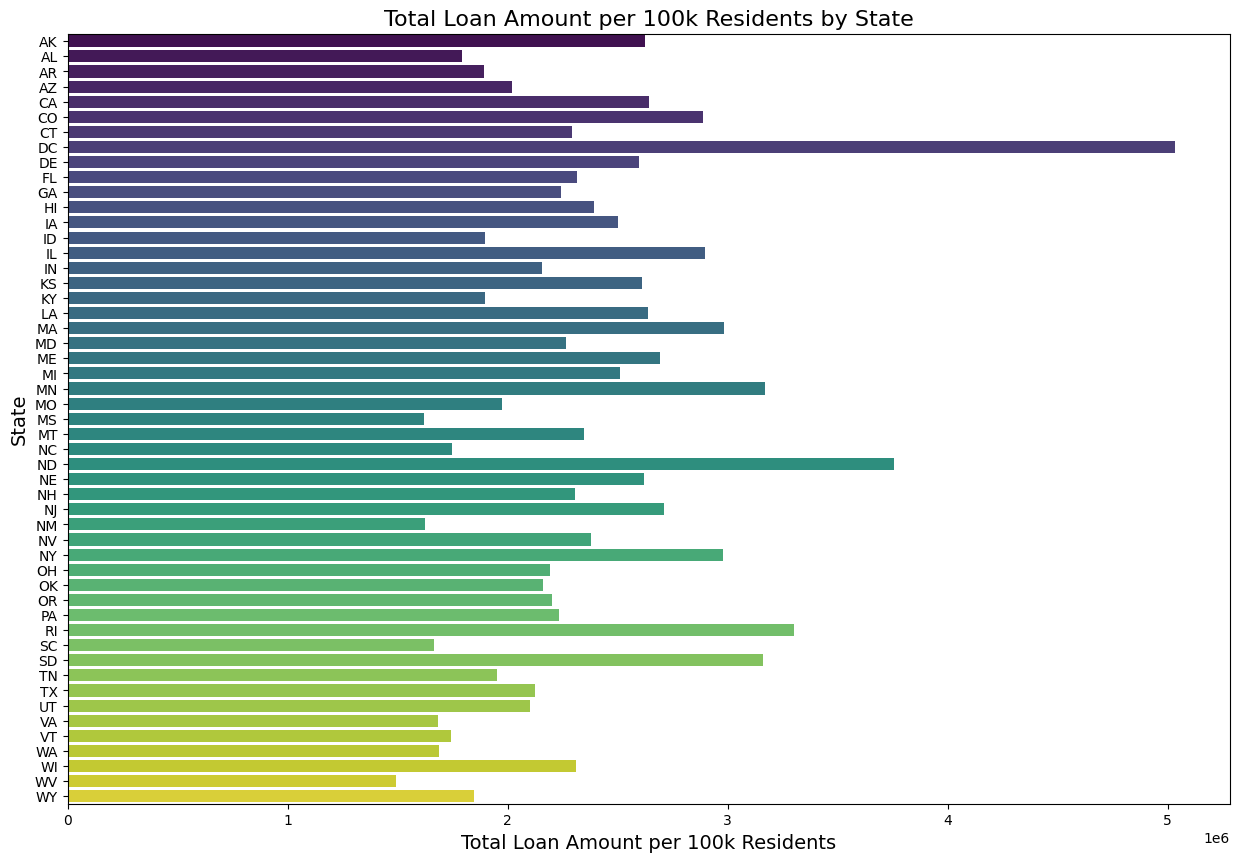

In [ ]:
plt.figure(figsize=(15, 10))

# Create the bar plot
sns.barplot(x='Total Loan Amount per 100k residents', y='state', data=state_loan_totals, palette='viridis')

# Add titles and labels
plt.title('Total Loan Amount per 100k Residents by State', fontsize=16)
plt.xlabel('Total Loan Amount per 100k Residents', fontsize=14)
plt.ylabel('State', fontsize=14)

# Show the plot
plt.show()

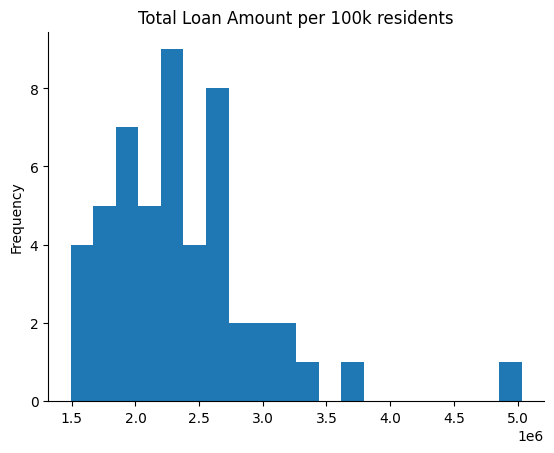

In [ ]:
# @title Total Loan Amount per 100k residents

from matplotlib import pyplot as plt
state_loan_totals['Total Loan Amount per 100k residents'].plot(kind='hist', bins=20, title='Total Loan Amount per 100k residents')
plt.gca().spines[['top', 'right',]].set_visible(False)

Create map

In [ ]:
state_loan_totals = state_loan_totals.rename(columns={'state':'State Name'})
state_loan_totals[['State Name', 'Total Loan Amount per 100k residents']].to_csv('CovidRecovery/CSV/state_loan_totals.csv', index=False)


In [ ]:
us_states = gpd.read_file('/content/drive/MyDrive/Data Engineering Hw2/cb_2020_us_state_500k.shp')

In [ ]:
us_states = us_states.rename(columns={'STUSPS':'State Name'})

In [ ]:
us_states = pd.merge(us_states,state_loan_totals, on='State Name', how='inner')
us_states.head()

,STATEFP,STATENS,AFFGEOID,GEOID,State Name,NAME,LSAD,ALAND,AWATER,geometry,CurrentApprovalAmount,POPESTIMATE2020,Total Loan Amount per 100k residents
0,35,00897535,0400000US35,35,NM,New Mexico,00,314198560935,726482115,"POLYGON ((-109.05017 31.48000, -109.04984 31.4...",6.877269e+07,4236976,1.623155e+06
1,46,01785534,0400000US46,46,SD,South Dakota,00,196345992286,3383664203,"POLYGON ((-104.05788 44.99761, -104.05078 44.9...",5.615438e+07,1775704,3.162373e+06
2,06,01779778,0400000US06,06,CA,California,00,403671196038,20294133830,"MULTIPOLYGON (((-118.60442 33.47855, -118.5987...",2.088940e+09,79006400,2.644013e+06
3,21,01779786,0400000US21,21,KY,Kentucky,00,102282796080,2368025703,"MULTIPOLYGON (((-89.41728 36.49901, -89.40565 ...",1.711557e+08,9016310,1.898290e+06
4,01,01779775,0400000US01,01,AL,Alabama,00,131175460655,4591915034,"MULTIPOLYGON (((-88.05338 30.50699, -88.05109 ...",1.804713e+08,10063728,1.793285e+06


In [ ]:
us_states.head()

,STATEFP,STATENS,AFFGEOID,GEOID,State Name,NAME,LSAD,ALAND,AWATER,geometry,CurrentApprovalAmount,POPESTIMATE2020,Total Loan Amount per 100k residents
0,35,00897535,0400000US35,35,NM,New Mexico,00,314198560935,726482115,"POLYGON ((-109.05017 31.48000, -109.04984 31.4...",6.877269e+07,4236976,1.623155e+06
1,46,01785534,0400000US46,46,SD,South Dakota,00,196345992286,3383664203,"POLYGON ((-104.05788 44.99761, -104.05078 44.9...",5.615438e+07,1775704,3.162373e+06
2,06,01779778,0400000US06,06,CA,California,00,403671196038,20294133830,"MULTIPOLYGON (((-118.60442 33.47855, -118.5987...",2.088940e+09,79006400,2.644013e+06
3,21,01779786,0400000US21,21,KY,Kentucky,00,102282796080,2368025703,"MULTIPOLYGON (((-89.41728 36.49901, -89.40565 ...",1.711557e+08,9016310,1.898290e+06
4,01,01779775,0400000US01,01,AL,Alabama,00,131175460655,4591915034,"MULTIPOLYGON (((-88.05338 30.50699, -88.05109 ...",1.804713e+08,10063728,1.793285e+06


<Axes: >

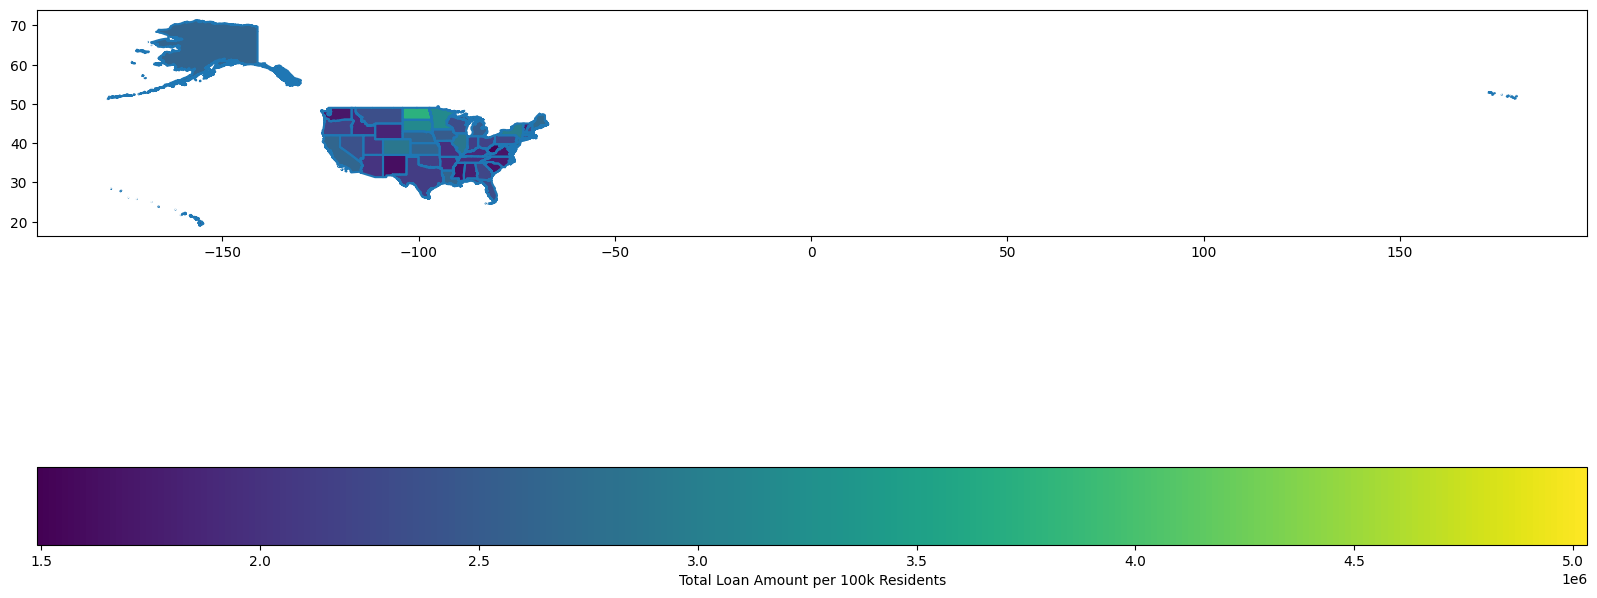

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(20, 20))
us_states.boundary.plot(ax=ax)
us_states.plot(column='Total Loan Amount per 100k residents', ax=ax, legend=True,
               legend_kwds={'label': "Total Loan Amount per 100k Residents",
                            'orientation': "horizontal"})

Githup


In [ ]:
"""
%cd /content/CovidRecovery
!git init
# Configure Git user information (if not already configured)
!git config --global user.email "k.hadjiantonis@gmail.com"
!git config --global user.name "khadjiantonis"
# Add remote repository
!git remote add origin https://github.com/khadjiantonis/CovidRecovery.git
# Create a sample file to commit
with open("README.md", "w") as f:
    f.write("# CovidRecovery\n\nRepository for CovidRecovery project.")
# Add all files to the repository
!git add .
!git commit -m "Initial commit of CovidRecovery folder"
!git push -u origin main

SyntaxError: incomplete input (<ipython-input-49-06ceb6d744bf>, line 1)